## Logistic Regresion Australia weather.

### Logistic Regression classifier to predict whether or not it will rain tomorrow in Australia.


Logistic Regresion it is a supervised learning classification algorithm which is used to predict observations to a discrete set of classes. Practically, it is used to classify observations into different categories. Logistic Regression algorithm helps us to classify observations into two or more discrete classes. So, the target variable is discrete in nature.

Instead, of fitting a line to the data, logistic regression fits an "S" shaped "logistic function".
In our example we have rain and not rain, if our model predict that the chances are more than 50% to be rain we will clasiffy that as rain.

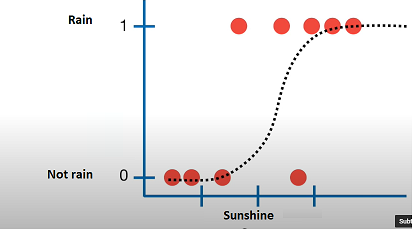

In Logistic Regression we can make simple mondels, like predict rain or not rain base just on sunshine, or complex models base on more variables.

      - rain or no predicted by "Sunshine" + "Location"
      - rain or no predicted by "Sunshine" + "Location" + "MaxTemp"
      - rain or no predicted by "Sunshine" + "Location" + "MaxTemp" + "RainToday"

Logistic regression can work with continuous data(like **MaxTemp**) and discrete data (like genotype and **Location**)  
Some methods lik "Wald's Test" will indicate whether a variable is relevant or not. 

In logistic regresion we use **R2** to compare models, but in Logistic regression we use **"Maximum likehood"**

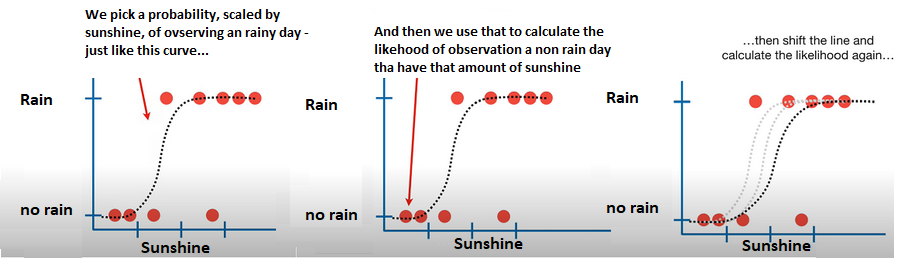

Finally, the curve with the maximum likelihood is selected.

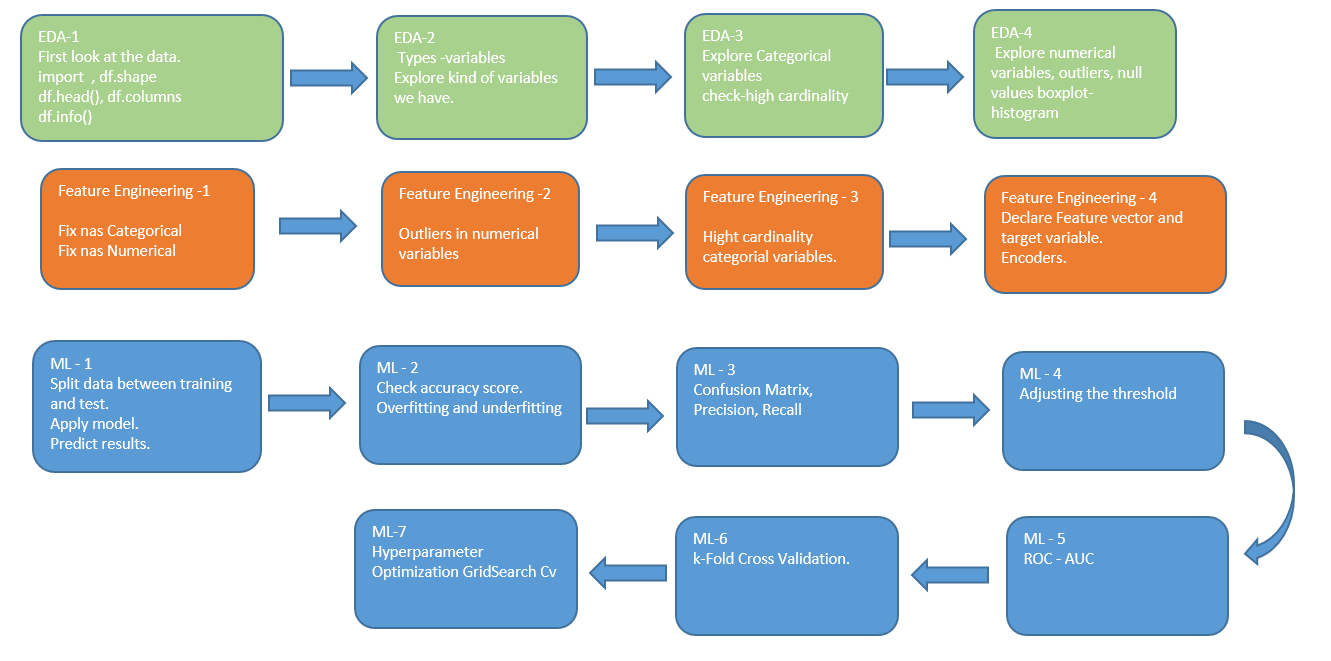

Once I clean my dataset I will save the data as "weatherAus_curate.csv", so I can use that dataset with other Classification algorithms and  I dont need to repeat all that steps again.

<a class="anchor" id="0.1"></a>
### **Table of Contents**


1.	[EDA-1 First look in the dataset](#1)
2.	[EDA-2 Explore Types-variables](#2)
3.	[EDA-3 Explore Categorical variables](#3)
4.  [EDA-4 Explore Numerical variables](#4)
5.	[FE-1 Fix nas Categorical and Numerical](#5)
6.	[FE-2 Outliers in Numerical variables](#6)
7.	[FE-3 Hight cardinality Categorical variables](#7)
8.	[FE-4 Declare Feature vector and target variable](#8)
9.	[ML-1 Split data training and test](#9)
10.	[ML-2 Check accuracy score Overfitting-underfitting](#10)
11.	[ML-3 Confusion Matrix-Precision-Recall](#11)
12.	[ML-4 Adjusting the threshold](#12)
13.	[ML-5 ROC-AUC](#13)
14.	[ML-6 K-Fold Cross Validation](#14)
15.	[ML-7 GridSearch Hyperparameter Optimization](#15)
16.	[Discussion](#16)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import os
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from sklearn.model_selection import GridSearchCV
import time



import warnings
warnings.filterwarnings('ignore')

# because I m getting the data from my laptop
data_path = str(os.environ.get("data")) # I use that to avoid show Personal Information(in the notebook) of my computer
# df = pd.read_csv('https://raw.githubusercontent.com/Enrique1987/data/master/weatherAUS.csv')
data_input = data_path + '//02_ML//weatherAUS.csv'
data_output = data_path + '//02_ML//curated/weatherAUS_curated.csv'
df = pd.read_csv(data_input)

### **EDA - 1**<a class="anchor" id="1"></a>
#### First look in the dataset
Every machine learning process has to start with EDA(Exploratory Data Analysis)

In [2]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
df.shape

(142193, 24)

In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In order to no affect the results we have to remove RISK-MM, we will add it later in another test to see it it its significative. The reason I imagine is that it is closely relate to the final result and  to leave it there would alter the process that is being carried out.

In [5]:
df.drop(['RISK_MM'], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

#### EDA-2<a class="anchor" id="2"></a>
#### Explore variables

#### Types of variables 
There are a mixture of categorical and numerical variables in the dataset.
Categorical variables have data type object. Numerical variables have data type float64.   

    'b'       boolean
    'i'       (signed) integer
    'u'       unsigned integer
    'f'       floating-point
    'c'       complex-floating point
    'O'       (Python) objects
    'S', 'a'  (byte-)string
    'U'       Unicode
    'V'       raw data (void)


In [7]:
categorical = [var for var in df.columns if df[var].dtype == 'O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)
df[categorical].head()

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


#### EDA - 3<a class="anchor" id="3"></a>
#### Explore of categorical variables


- There is a date variable. It is denoted by `Date` column.


- There are 6 categorical variables. These are given by `Location`, `WindGustDir`, `WindDir9am`, `WindDir3pm`, `RainToday` and  `RainTomorrow`.


- There are two binary categorical variables - `RainToday` and  `RainTomorrow`.


- `RainTomorrow` is the target variable.

In [8]:
numerical = set(df.columns.values) - set(categorical)
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)
df[numerical].head()

There are 16 numerical variables

The numerical variables are : {'Pressure3pm', 'MaxTemp', 'Humidity9am', 'Cloud3pm', 'Cloud9am', 'WindGustSpeed', 'Pressure9am', 'Humidity3pm', 'Sunshine', 'Temp9am', 'Rainfall', 'MinTemp', 'WindSpeed3pm', 'WindSpeed9am', 'Temp3pm', 'Evaporation'}


,Pressure3pm,MaxTemp,Humidity9am,Cloud3pm,Cloud9am,WindGustSpeed,Pressure9am,Humidity3pm,Sunshine,Temp9am,Rainfall,MinTemp,WindSpeed3pm,WindSpeed9am,Temp3pm,Evaporation
0,1007.1,22.9,71.0,NaN,8.0,44.0,1007.7,22.0,NaN,16.9,0.6,13.4,24.0,20.0,21.8,NaN
1,1007.8,25.1,44.0,NaN,NaN,44.0,1010.6,25.0,NaN,17.2,0.0,7.4,22.0,4.0,24.3,NaN
2,1008.7,25.7,38.0,2.0,NaN,46.0,1007.6,30.0,NaN,21.0,0.0,12.9,26.0,19.0,23.2,NaN
3,1012.8,28.0,45.0,NaN,NaN,24.0,1017.6,16.0,NaN,18.1,0.0,9.2,9.0,11.0,26.5,NaN
4,1006.0,32.3,82.0,8.0,7.0,41.0,1010.8,33.0,NaN,17.8,1.0,17.5,20.0,7.0,29.7,NaN


#### Explore problems with categorical variables, (high cardinality)

The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model.
 - For example when we try the One-Hot encoding, in order convert categorical data into numerical, if our cardinality its too big will incur in "Curse of dimensionality" https://en.wikipedia.org/wiki/Curse_of_dimensionality
 - A column with a very high cardinality(e.g some `<column_name_id>` which are usually unique id, it would be better to remove that attributes as it only carries noise.

In [9]:
for var in categorical:   
    print(var.ljust(12, ' ') +  ' contains '.rjust(10, ' '),\
          str(len(df[var].unique())).rjust(5, ' '), ' labels')

Date         contains   3436  labels
Location     contains     49  labels
WindGustDir  contains     17  labels
WindDir9am   contains     17  labels
WindDir3pm   contains     17  labels
RainToday    contains      3  labels
RainTomorrow contains      2  labels


The attribute "Date" presents a high cardinality but we will fix it later subdividing day-month-year

### EDA - 4<a class="anchor" id="4"></a>

#### Explore problems with numerical variables (outliers and null values)

In [10]:
# check missing values in numerical variables

df[numerical].isnull().sum()

Pressure3pm      13981
MaxTemp            322
Humidity9am       1774
Cloud3pm         57094
Cloud9am         53657
WindGustSpeed     9270
Pressure9am      14014
Humidity3pm       3610
Sunshine         67816
Temp9am            904
Rainfall          1406
MinTemp            637
WindSpeed3pm      2630
WindSpeed9am      1348
Temp3pm           2726
Evaporation      60843
dtype: int64

#### Outliers

We have to be very carefull with outliers, not all outliers are wrong, sometimes just show us a special event.

*Usually, it is a mistake to remove an 'outlier' from a dataset unless you can establish that the observation in question arose from a documentable error (equipment failure, data entry error, etc.) or you know for sure that its value is impossible (person's age above 140, negative height, etc.)*
[more info](https://stats.stackexchange.com/questions/469483/what-are-good-methods-to-deal-with-outliers-when-calculating-mean-of-data).

In our specific case, our task is, based on given data, to try to create an algorithm that attempts to predict an event, in this case whether it will rain or not. That is we are not using our dataset to learn about events that have happend, in that case the ouliers could be very interesting.

Outliers example that could be interesting for another analysis could be when the avergae rainfall is 2 and we have a maximum value of 371 that is repeated every year, in the same location and time...

**Finally**
We going to compare the results  of our model with and without outliers to see if it have a impact in the results. Thats why we need a copy of our df and in that copy we dont going to apply any method of dealing with outliers later on we will apply the model of ml to that df.



In [11]:
df_no_outliers_correction = df.copy()

In [12]:
# Outliers in numerical variables

# view summary statistics in numerical variables

print(round(df[numerical].describe()), 2)


       Pressure3pm   MaxTemp  Humidity9am  Cloud3pm  Cloud9am  WindGustSpeed  \
count     128212.0  141871.0     140419.0   85099.0   88536.0       132923.0   
mean        1015.0      23.0         69.0       5.0       4.0           40.0   
std            7.0       7.0         19.0       3.0       3.0           14.0   
min          977.0      -5.0          0.0       0.0       0.0            6.0   
25%         1010.0      18.0         57.0       2.0       1.0           31.0   
50%         1015.0      23.0         70.0       5.0       5.0           39.0   
75%         1020.0      28.0         83.0       7.0       7.0           48.0   
max         1040.0      48.0        100.0       9.0       9.0          135.0   

       Pressure9am  Humidity3pm  Sunshine   Temp9am  Rainfall   MinTemp  \
count     128179.0     138583.0   74377.0  141289.0  140787.0  141556.0   
mean        1018.0         51.0       8.0      17.0       2.0      12.0   
std            7.0         21.0       4.0       6.0   

We can appreciate that some of them `Rainfall`, `Evaporation`, `WindSpeed9am` and `WindSpeed3pm` present outlieers

In [13]:
outliers = ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm' ]

We will draw boxplots to visualise outliers, if we found negative values ​​these would clearly be errors and we would treat them as if they were na


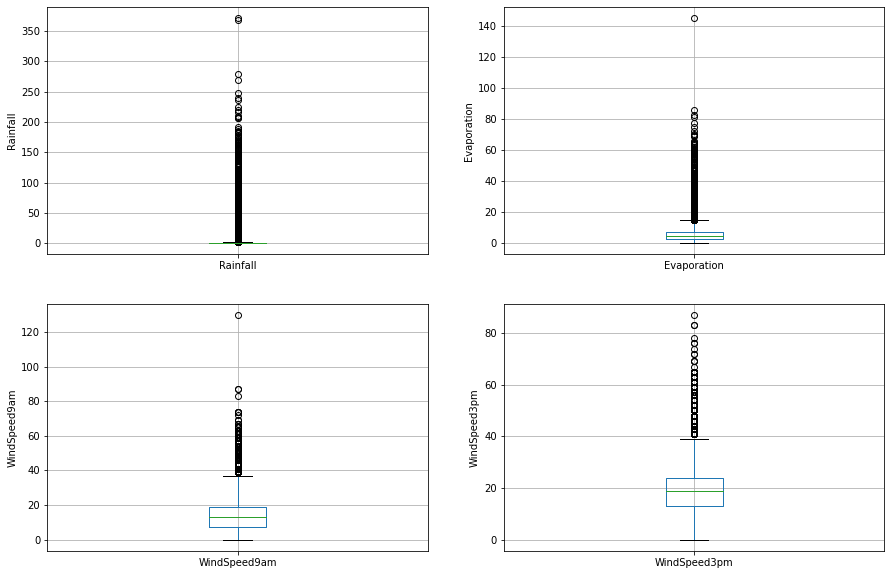

In [14]:
plt.figure(figsize=(15,10))
position = 0
for attribute_outlier in outliers:
    position += 1
    plt.subplot(2, 2, position)
    fig = df.boxplot(column=attribute_outlier)
    fig.set_title('')
    fig.set_ylabel(attribute_outlier)

We can confirm that there are a lot of outliers in these variables

#### Check distribution of variables
Let's take a look at the distribution of the data in the candidate outlier variables.

One of the most common methods of dealing with outliers is IQR 

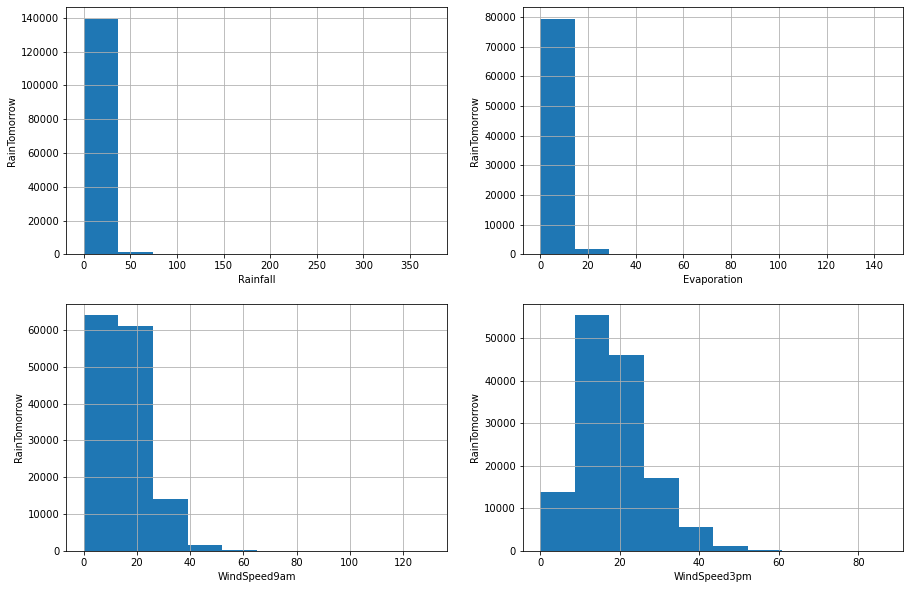

In [15]:
plt.figure(figsize=(15, 10))
position = 0
for attribute_outlier in outliers:
    position += 1
    plt.subplot(2, 2, position)
    fig = df[attribute_outlier].hist(bins=10)
    fig.set_xlabel(attribute_outlier)
    fig.set_ylabel('RainTomorrow')

We can see that all the four variables are skewed*. So, we will use interquantile range to find outliers.  

In [16]:
# find outliers for Rainfall variable

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Rainfall outliers are values < -2.4000000000000004 or > 3.2


In [17]:
dic_values_outlieras = {}
dic_values_outlieras["pepe"] = 2

In [18]:
print(outliers)

['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']


In [19]:
dic_values_outliers = {}
for attribute_outlier in outliers:
    IQR = df[attribute_outlier].quantile(0.75) - df[attribute_outlier].quantile(0.25)
    value_dic_lower = "Lower_fence_" + attribute_outlier
    value_dic_upper = "Upper_fence_" + attribute_outlier
    dic_values_outliers[value_dic_lower] = round(df[attribute_outlier].quantile(0.25) - (IQR * 3), 4)
    dic_values_outliers[value_dic_upper] = round(df[attribute_outlier].quantile(0.75) + (IQR * 3), 4)
    print('{attribute} outliers are values < {lowerboundary} or  {upperboundary} < values'\
          .format(attribute=attribute_outlier, lowerboundary=dic_values_outliers[value_dic_lower]\
                  , upperboundary=dic_values_outliers[value_dic_upper]))
    

Rainfall outliers are values < -2.4 or  3.2 < values
Evaporation outliers are values < -11.8 or  21.8 < values
WindSpeed9am outliers are values < -29.0 or  55.0 < values
WindSpeed3pm outliers are values < -20.0 or  57.0 < values


In [20]:
# ToDO create a function that find if the Lower_fende or Upper_fence below to outliers
for attribute_outlier in outliers:
    print(f'For {attribute_outlier}, the minimum is {df[attribute_outlier].min()} ' +
          f'and the maximum is {df[attribute_outlier].max()}. ' +
          f'So the outliers are values > {dic_values_outliers["Upper_fence_" + attribute_outlier]}')

#For Rainfall, the minimum and maximum values are 0.0 and 371.0. So, the outliers are values > 3.2.

For Rainfall, the minimum is 0.0 and the maximum is 371.0. So the outliers are values > 3.2
For Evaporation, the minimum is 0.0 and the maximum is 145.0. So the outliers are values > 21.8
For WindSpeed9am, the minimum is 0.0 and the maximum is 130.0. So the outliers are values > 55.0
For WindSpeed3pm, the minimum is 0.0 and the maximum is 87.0. So the outliers are values > 57.0


### Feature Engineering - 1<a class="anchor" id="5"></a>
#### Fix Error Categorical, fix error numerical

Its time to fix the error sin numerical and Categorical variables.
Fix problem with null values.

In [21]:
df[numerical].isnull().sum()

Pressure3pm      13981
MaxTemp            322
Humidity9am       1774
Cloud3pm         57094
Cloud9am         53657
WindGustSpeed     9270
Pressure9am      14014
Humidity3pm       3610
Sunshine         67816
Temp9am            904
Rainfall          1406
MinTemp            637
WindSpeed3pm      2630
WindSpeed9am      1348
Temp3pm           2726
Evaporation      60843
dtype: int64

Depending on what percentage represents the na we could think of discarding the attribute.

In [22]:
print("Percentage of missing values in the numerical variables in training set: \n")

for col in numerical:
    if df[col].isnull().mean() > 0:
        print(col, round(df[col].isnull().mean(), 4))

Percentage of missing values in the numerical variables in training set: 

Pressure3pm 0.0983
MaxTemp 0.0023
Humidity9am 0.0125
Cloud3pm 0.4015
Cloud9am 0.3774
WindGustSpeed 0.0652
Pressure9am 0.0986
Humidity3pm 0.0254
Sunshine 0.4769
Temp9am 0.0064
Rainfall 0.0099
MinTemp 0.0045
WindSpeed3pm 0.0185
WindSpeed9am 0.0095
Temp3pm 0.0192
Evaporation 0.4279


#### Assumption null values
We assume that the data are missing completely at random (MCAR).
There are two methods which can be used to impute missing values.
One is mean imputation and other one is random sample imputation. 

When there are outliers in the dataset, we should use median imputation as it is robust to outliers.

In [23]:
for col in numerical:
    col_median = df[col].median()
    df[col].fillna(col_median, inplace=True)  

Check again missing values in numerical variables.

In [24]:
df[numerical].isnull().sum()

Pressure3pm      0
MaxTemp          0
Humidity9am      0
Cloud3pm         0
Cloud9am         0
WindGustSpeed    0
Pressure9am      0
Humidity3pm      0
Sunshine         0
Temp9am          0
Rainfall         0
MinTemp          0
WindSpeed3pm     0
WindSpeed9am     0
Temp3pm          0
Evaporation      0
dtype: int64

Now fix null values with Categoricals variables. In the Categorical variables the null values will be replace by mode.

In [25]:
df[categorical].isnull().mean()

Date            0.000000
Location        0.000000
WindGustDir     0.065615
WindDir9am      0.070418
WindDir3pm      0.026570
RainToday       0.009888
RainTomorrow    0.000000
dtype: float64

In [26]:
for col in categorical:
    if df[col].isnull().mean() > 0:
        print(col, (df[col].isnull().mean()))

WindGustDir 0.06561504434114197
WindDir9am 0.07041837502549352
WindDir3pm 0.026569521706413114
RainToday 0.009887969168665123


In [27]:
# Fix categorical null

for col in categorical:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [28]:
# Check results
df[categorical].isnull().sum()

Date            0
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

Finally double check the whole dataset to ensure thare are not null values

In [29]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

### Feature Engineering - 2<a class="anchor" id="6"></a>
#### outliers in numerical variables

We have seen that the `Rainfall`, `Evaporation`, `WindSpeed9am` and `WindSpeed3pm` columns contain outliers. We will use top-coding approach to cap maximum values and remove outliers from the above variables.
We will re-use the value of Upper_fence, that

In [30]:
def set_max_value(df, variable, top):
    return np.where(df[variable] > top, top, df[variable])

In [31]:
for col in outliers:
    value_dic_upper = "Upper_fence_" + col
    df[col] = set_max_value(df, col, round(dic_values_outliers[value_dic_upper], 2)) 

Check if the method worked , if it workend when we look for the maximal for the outliers should be always the Upper_fence

In [32]:
for col in outliers:
    print(f'Max values of {col} is :', df[col].max() )

Max values of Rainfall is : 3.2
Max values of Evaporation is : 21.8
Max values of WindSpeed9am is : 55.0
Max values of WindSpeed3pm is : 57.0


### Feature Engineering - 3<a class="anchor" id="7"></a> 
#### Fix high cardinality(when possible) categorical variables

we going to make a copy of the df to apply to make some stress test, like for example add a column with extrely high cardinallity and see how it behaves when doing a one-hot encoding.

In [33]:
df_high_cardinality = df.copy()

In [34]:
print(categorical)
for var in categorical:   
    print(var.ljust(12, ' ') +  ' contains '.rjust(10, ' '),\
          str(len(df[var].unique())).rjust(5, ' '), ' labels')

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Date         contains   3436  labels
Location     contains     49  labels
WindGustDir  contains     16  labels
WindDir9am   contains     16  labels
WindDir3pm   contains     16  labels
RainToday    contains      2  labels
RainTomorrow contains      2  labels


We can confirm that `date` its a candidate to be fix in the high cardinality, the trick will be split `date` into `year`, `month`, `day`.

In [35]:
# parse the dates, currently coded as strings, into datetime format

df['Date'] = pd.to_datetime(df['Date'])

# extract year from date

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# remove day from categorical
categorical.remove('Date')

# drop the original Date variable
df.drop('Date', axis=1, inplace = True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,4.8,8.5,W,44.0,W,WNW,...,1007.1,8.0,5.0,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,4.8,8.5,WNW,44.0,NNW,WSW,...,1007.8,5.0,5.0,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,4.8,8.5,WSW,46.0,W,WSW,...,1008.7,5.0,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,4.8,8.5,NE,24.0,SE,E,...,1012.8,5.0,5.0,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,4.8,8.5,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [36]:
categorical

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

### Feature Engineering - 4<a class="anchor" id="8"></a>
- **Declare feature vector and target variable.**
- **Encoders.**
- **Feature scaling.**

#### Feature vector and target variable

In [37]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

#### Encoders

In [38]:
X = pd.concat([X[numerical],  pd.get_dummies(X.RainToday),
                     pd.get_dummies(X.Location), 
                     pd.get_dummies(X.WindGustDir),
                     pd.get_dummies(X.WindDir9am),
                     pd.get_dummies(X.WindDir3pm)], axis=1)

#### Feature Scaling
We should map all the feature variables onto the same scale. It is called `feature scaling`. Note that no all the the Ml algoriths use the Feature Scaling

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cols = X.columns

#### Test - 3

What are the reults if we don´t scale the values ? so we make a copy of Feature verctor and we dont going to scale it in the predictions.

In [40]:
X_test_scaler = X.copy()

In [41]:
X = scaler.fit_transform(X)

In [42]:
# we have to re-recate our dataframe
X = pd.DataFrame(X, columns=[cols])

### ML - 1<a class="anchor" id="9"></a>
#### Split data between training and test, and apply the model, predict results

In [43]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [44]:
X_train.shape, X_test.shape

((113754, 115), (28439, 115))

In [45]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

y_pred_test = logreg.predict(X_test)

### ML - 2<a class="anchor" id="10"></a>
#### Check accuracy score

In [46]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

accuracy = round(accuracy_score(y_test, y_pred_test), 4)
recall = round(recall_score(y_test, y_pred_test, pos_label="Yes"), 4)
precision = round(precision_score(y_test, y_pred_test, pos_label="Yes"), 4)
print('Model accuracy score: {0:0.4f}'. format(accuracy))
print('Model recall score: {0:0.4f}'. format(recall))
print('Model precision score: {0:0.4f}'. format(precision))

Model accuracy score: 0.8499
Model recall score: 0.5127
Model precision score: 0.7373


In [47]:
y_pred_train = logreg.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8473


#### Check for overfitting and underfitting

In [48]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score:'.ljust(20, ' ') + '{:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8473
Test set score:     0.8499


Similar score in test and training it could be a signal of `underfitting`, however this rules out automatically of overfitting.

 -  For **underfitting models**, you do worse because they do not capture the true trend sufficiently.

If you get more underfitting then you get both worse fits for training and testing data.

  - For **overfitting models**, you do worse because they respond too much to the noise, rather than the true trend.

#### Dealing with underfitting

In Deep Learning you can choose to extend your Training cycles, as it could improve the performance or your model.
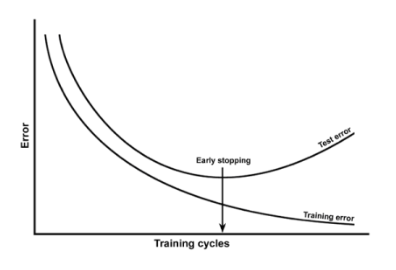
But in a static model like Logistic regresion what you can do its to play with hyperparameters to increase the performance of your model [more details](https://stats.stackexchange.com/questions/355774/how-to-know-if-model-is-overfitting-or-underfitting/571258#571258)

#### Tunning C parameter

In [49]:
def tunning_c_parameter(min_value=0.001, max_value=100):
    """Compare accury with differents values of split"""
    C_value = min_value
    while C_value <= max_value:
        print("\nC value of:", C_value)
        logreg = LogisticRegression(C=C_value, solver='liblinear', random_state=0)
        logreg.fit(X_train, y_train)
        y_pred_test = logreg.predict(X_test)
        print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
        print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))
        C_value = C_value * 10

In [50]:
tunning_c_parameter()


C value of: 0.001
Training set score: 0.8192
Test set score: 0.8201

C value of: 0.01
Training set score: 0.8411
Test set score: 0.8447

C value of: 0.1
Training set score: 0.8461
Test set score: 0.8503

C value of: 1.0
Training set score: 0.8473
Test set score: 0.8499

C value of: 10.0
Training set score: 0.8477
Test set score: 0.8501

C value of: 100.0
Training set score: 0.8475
Test set score: 0.8501


We have found that the perfect hyperparameter for for accuracy is C = 10

#### Compare model accuracy with null accuracy


So, the model accuracy is 0.8501. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the **null accuracy**. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.
Remember a e
So, we should first check the class distribution in the test set.

In [51]:
# check class distribution in test set

y_test.value_counts()

No     22067
Yes     6372
Name: RainTomorrow, dtype: int64

In [52]:
#check null accuracy score

null_accuracy = (22067/(22067+6372))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7759


Our model have a accuracy > null accuracy, so its a good model, but `Accuracy its not a good metric 
in classification models`.

A spam classifier model where 99.9% of the emails are not spam, simply setting "no spam" as the default value has an accuracy of 99.9% is it a good model? obviously not.

### ML - 3<a class="anchor" id="11"></a>
#### Confusion Matrix, Precision, Recall
(here is a lot of theorie, but I consider it one of the most important parts)  

A confusion matrix is a tool for summarizing the performance of a classification algorithm.

**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**

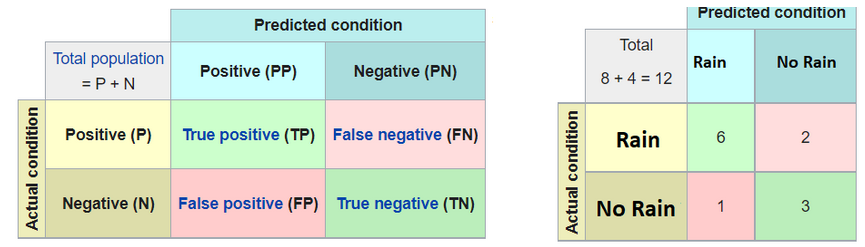

#### Recall(sensitivity)       vs         Precision

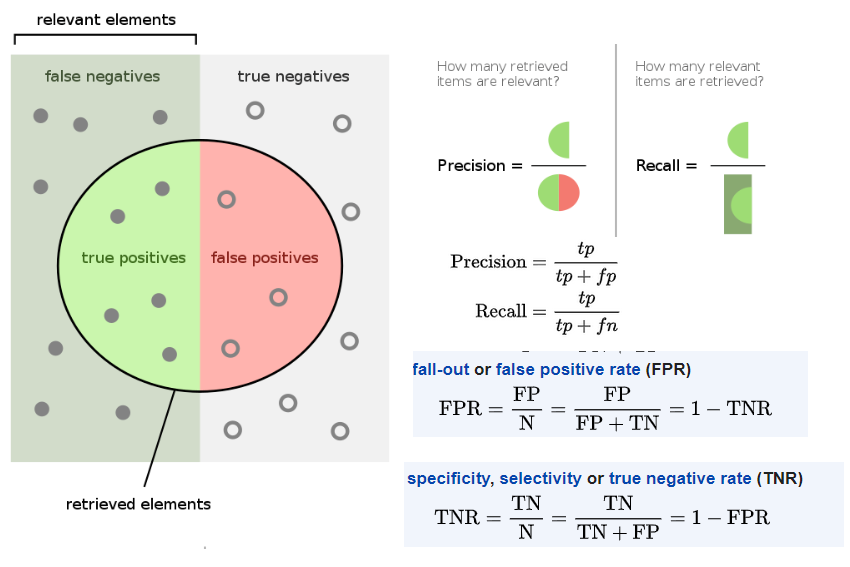

In [53]:
#     0  1
#    ------
# 0  |TP  FN
# 1  |FP  TN

from sklearn.metrics import confusion_matrix

cm_first = confusion_matrix(y_test, y_pred_test, labels=["Yes", "No"])

print('Confusion matrix\n\n', cm_first)

tp =  cm_first[0, 0]
tn =  cm_first[1, 1]
fn = cm_first[0, 1]
fp = cm_first[1, 0]

print('\nTrue Positives(TP) = ', tp)

print('\nTrue Negatives(TN) = ', tn)

print('\nFalse Positives(FN) = ', fn)

print('\nFalse Negatives(FP) = ', fp)

manual_recall = round(tp/(tp + fn), 4)
manual_precision = round(tp/(tp + fp), 4)

print("\n-- Check if we have indentify correctly the confusion matrix values ---")
print('\nManual Recall = {} vs recall Metric scikit {}'.format(manual_recall, recall))
print('\nManual Precision = {} vs Precision Metric scikit {}'.format(manual_precision, precision))

Confusion matrix

 [[ 3267  3105]
 [ 1164 20903]]

True Positives(TP) =  3267

True Negatives(TN) =  20903

False Positives(FN) =  3105

False Negatives(FP) =  1164

-- Check if we have indentify correctly the confusion matrix values ---

Manual Recall = 0.5127 vs recall Metric scikit 0.5127

Manual Precision = 0.7373 vs Precision Metric scikit 0.7373


#### Warning !!!! if you dont specify the labels !! the confusion matrix its inverse 
[link](https://stackoverflow.com/questions/35178590/scikit-learn-confusion-matrix)

In [54]:
#     1  0
#    ------
# 1  |TP  FN    --> TP are (1,1)  --> thats is wrong 
# 0  |FP  TN
cm_wrong = confusion_matrix(y_test, y_pred_test)

print('\nInverse Confusion matrix = WRONG!!\n\n', cm_wrong)


Inverse Confusion matrix = WRONG!!

 [[20903  1164]
 [ 3105  3267]]


<AxesSubplot:>

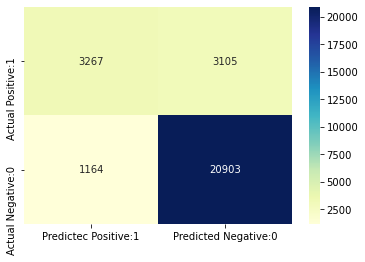

In [55]:
# visualize confusion matrix with seaborn heatmap

cm_matrix_first = pd.DataFrame(data=cm_first, columns=['Predictec Positive:1', 'Predicted Negative:0'], 
                                 index=['Actual Positive:1', 'Actual Negative:0'])

sns.heatmap(cm_matrix_first, annot=True, fmt='d', cmap='YlGnBu',  cbar_kws={'orientation': 'vertical'} )

#### When is precision more important over recall and vice versa ?

**Recall**: Having the formula `(tp/tp + fn)` The Focus on reduce the **fn**. "All the guilty in jail and if there is an innocent it is not so important"  

*TP* = gulty in jail  
*TN* = inocent free  
*FP* = inocent in jain  
*FN* = gulty free  --> if we are focus on Recall we have to recude that 

`Example1 Potentional customer`:
       Potential clients register to buy a course. It is important that we do not lose a potential client however               if we call candidates who are not interested it is not important (precision is not important here).
    
    
`Example2 YT blocker`: violent content blocker by YT, for YT it is important that no channel with violent content is published, so it will block in advance any suspect of having violent content in order not to lose any TP, if any creator of violent content turns out to be your content gets blocked by mistake fixing this error is much less costly for the platform than having passed violent content.

**Precision**: "It is preferable to have a guilty man free than to have an innocent man in jail."
   formula  = `tp/(tp + fp)`: Focuse on reduce the **fp** (false positive) are important (i.e. you DONT want them, or as few as possible).
   
`pregnancy test`: With a pregnancy test, the test manufacturer needs to be sure that a positive result means the woman is really pregnant. People might react to a positive test by suddenly getting married or buying a house (if many consumers got false positives and suffered huge costs for no reason, the test manufacturer would lack customers

#### So comming to our use-case What its more important in our model Precision or recall ? 

We are trying to predict if it is going to rain or not, first we have to define our values.

TP = forecast rain and raining  
TN = forecast no rain and no raining  
FN = forecast no rain but raining  
FP = forecast raining but no raining  


where is our pain point? 

    1) Predict that it will rain and we're wrong.  `FP`
    2) Predict that it won't rain and be wrong.  `FN`

We believe it is more important to be able to reduce the FN (we predict won´t rain and be wrong) this is because preparing for rain, i.e carrying an umbrella and then not getting rained on is less bad than not carrying an umbrella and then suddenly getting rained on and ednding up wet.

As we have to focus on reduce the FN, was we are looking for a model with biggest Recall, as Recall formula is:

`tp/(tp + fn)`

#### Adjusting C again based on what we really want its to increase recall

In [56]:

def tunning_c_parameter_cm(min_value=0.001, max_value=100):
    """Optain the biggest recall."""
    C_value = min_value
    max_recall = 0
    optimal_c = 1
    while C_value <= max_value:
        print("\nC value of:", C_value)
        logreg = LogisticRegression(C=C_value, solver='liblinear', random_state=0)
        logreg.fit(X_train, y_train)
        y_pred_test = logreg.predict(X_test)

        cm = confusion_matrix(y_test, y_pred_test, labels=["Yes", "No"])       
        recall = round(cm[0,0] / (cm[0,0] + cm[0,1]), 4) # tp / (tp + fn)
        print("\nRecall:", recall)
        
        if recall > max_recall:
            max_recall = recall
            optimal_c = C_value
 
        
        C_value = C_value * 10
    print(f'the bigest recall is: {max_recall} obtained with a value of C={optimal_c}')

    logreg = LogisticRegression(C=optimal_c, solver='liblinear', random_state=0)
    logreg.fit(X_train, y_train)
    y_pred_test = logreg.predict(X_test)

    cm = confusion_matrix(y_test, y_pred_test)
    cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


C value of: 0.001

Recall: 0.2996

C value of: 0.01

Recall: 0.4601

C value of: 0.1

Recall: 0.5096

C value of: 1.0

Recall: 0.5127

C value of: 10.0

Recall: 0.5149

C value of: 100.0

Recall: 0.5154
the bigest recall is: 0.5154 obtained with a value of C=100.0


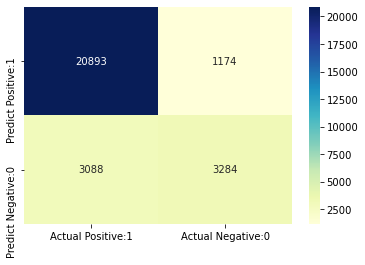

In [57]:
tunning_c_parameter_cm()

Recall has not been significantly increased by adjusting C parameter.

### ML - 4<a class="anchor" id="12"></a>
##### Adjusting the threshold level 

It's about finding the perfect threshold that gives the best results for what we want. In our case we are interested to find the perfect threshold taht increase our **Recall**.

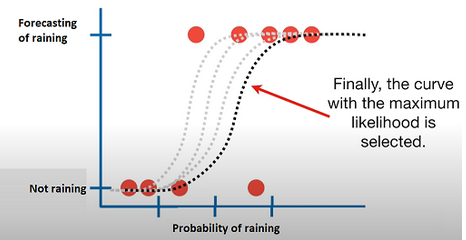

The default threshold is 0.5, the question we ask ourselves is if there could be one that would give us better results ?

In [58]:
# predict the first 10 predicted probabilities of two clases 0 and 1.

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob


array([[0.91647663, 0.08352337],
       [0.82792524, 0.17207476],
       [0.8142915 , 0.1857085 ],
       [0.98940649, 0.01059351],
       [0.95648339, 0.04351661],
       [0.97907991, 0.02092009],
       [0.16565966, 0.83434034],
       [0.2305221 , 0.7694779 ],
       [0.89985003, 0.10014997],
       [0.8661704 , 0.1338296 ]])

#### Observation

- In each row, the numbers sum to 1.  
- There are 2 columns which correspond to 2 classes - 0 and 1.

    - Class 0 - predicted probability that there is no rain tomorrow.    
    
    - Class 1 - predicted probability that there is rain tomorrow.

- Classification threshold level

    - There is a classification threshold level of 0.5.    
   
    - Class 1 - probability of rain is predicted if probability > 0.5.    
    
    - Class 0 - probability of no rain is predicted if probability < 0.5.    
    
Through binarize is the way we have to adjust our threshold

In [59]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No rain tomorrow (0)', 'Prob of - Rain tomorrow (1)'])

y_pred_prob_df

,Prob of - No rain tomorrow (0),Prob of - Rain tomorrow (1)
0,0.916477,0.083523
1,0.827925,0.172075
2,0.814292,0.185708
3,0.989406,0.010594
4,0.956483,0.043517
5,0.979080,0.020920
6,0.165660,0.834340
7,0.230522,0.769478
8,0.899850,0.100150
9,0.866170,0.133830


Text(0, 0.5, 'Frequency')

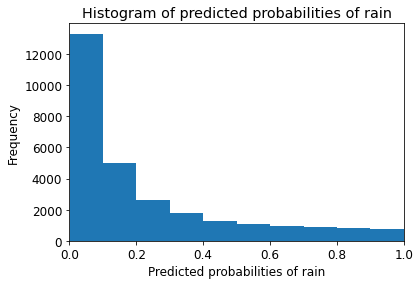

In [60]:
# store the predicted probabilities for class 1 - Probability of rain

y_pred1 = logreg.predict_proba(X_test)[:, 1]

# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of rain')


# set the x-axis limit
plt.xlim(0, 1)


# set the title
plt.xlabel('Predicted probabilities of rain')
plt.ylabel('Frequency')

#### Example binarize setting the thresold to 01

That means that if the probability to rain its bigger than 0.1 we will predict a 1 = Yes

In [61]:
from sklearn.preprocessing import binarize

y_pred1 = logreg.predict_proba(X_test)[:, 1]

y_pred1  


array([0.08352337, 0.17207476, 0.1857085 , ..., 0.0246499 , 0.18732683,
       0.69699455])

In [62]:
y_pred1 = y_pred1.reshape(-1, 1)  # row into column

In [63]:
y_pred1

array([[0.08352337],
       [0.17207476],
       [0.1857085 ],
       ...,
       [0.0246499 ],
       [0.18732683],
       [0.69699455]])

In [64]:
y_pred2 = binarize(y_pred1, 1/10)
y_pred2

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [1.],
       [1.]])

In [65]:
df_binarize01 = pd.DataFrame(list(zip(list(y_pred1.ravel()), list(y_pred2.ravel()))),\
                             columns=["probability_of_rain", "predicted_of_rain"]) # use ravel ro remove '[]' from numpy array
df_binarize01.head()

,probability_of_rain,predicted_of_rain
0,0.083523,0.0
1,0.172075,1.0
2,0.185708,1.0
3,0.010594,0.0
4,0.043517,0.0


In [66]:
y_pred3 = np.where(y_pred2 == 1, 'Yes', 'No')
y_pred3

array([['No'],
       ['Yes'],
       ['Yes'],
       ...,
       ['No'],
       ['Yes'],
       ['Yes']], dtype='<U3')

In [67]:
cm1 = confusion_matrix(y_test, y_pred3, labels=["Yes", "No"])

print('Confusion matrix\n\n', cm1)
recall_01 = round(cm1[0, 0] / (cm1[0, 0] + cm1[0, 1]), 4) # tp 7 (tp + fn)
print("\nRecall:", recall_01)

Confusion matrix

 [[ 5826   546]
 [ 9325 12742]]

Recall: 0.9143


#### Wow !!!

we have found that by adjusting our *threshold=0.1* our recall has increased from 0.51 to 0.9589
Is this the best we can find ?  lets create a program that check that for us. We going to try threshold from 0.1 to 0.9

In [68]:
def recall_fpr(confusion_matrix):
    cm = confusion_matrix
    recall = round(cm[0, 0] / (cm[0, 0] + cm[0, 1]), 3) # #TP /(TP + FN)
    False_Positive_rate = round(cm[1, 0] / (cm[1, 0] + cm[1, 1]), 3) #FP /(FP + TN)
    
    return recall, False_Positive_rate

In [69]:

recall_list = []
fpr_list = []

for i in range(0, 10):
    
    cm_opt = 0

    y_pred1 = logreg.predict_proba(X_test)[:, 1]
    y_pred1 = y_pred1.reshape(-1, 1)
    y_pred2 = binarize(y_pred1, i/10)
    y_pred2 = np.where(y_pred2 == 1, 'Yes', 'No')
    cm_opt = confusion_matrix(y_test, y_pred2, labels=["Yes", "No"])
    
    recall, fpr = recall_fpr(cm_opt)
    recall_list.append(recall)
    fpr_list.append(fpr)
    precision = precision_score(y_test, y_pred2, pos_label="Yes")
    accuracy = accuracy_score(y_test, y_pred2)

        
    print ('With', i/10,'threshold the Confusion Matrix is ','\n\n',cm_opt,'\n',
           
            'with',cm_opt[0, 0] + cm_opt[1, 1],'correct predictions, ', '\n', 
           
           
           'Accuracy score: ', accuracy, '\n',
            
           'Recall(Sensitivity): ', recall, '\n',
           
           'Precision: ',precision ,'\n',
           
           'False Positive Rate', fpr, '\n',
          
            '====================================================', '\n')
    
print("\nSummarize of recalls:", recall_list)
print("Summarize of False Positives rate:", fpr_list)

With 0.0 threshold the Confusion Matrix is  

 [[ 6372     0]
 [22067     0]] 
 with 6372 correct predictions,  
 Accuracy score:  0.22405851119940925 
 Recall(Sensitivity):  1.0 
 Precision:  0.22405851119940925 
 False Positive Rate 1.0 

With 0.1 threshold the Confusion Matrix is  

 [[ 5826   546]
 [ 9325 12742]] 
 with 18568 correct predictions,  
 Accuracy score:  0.6529062203312352 
 Recall(Sensitivity):  0.914 
 Precision:  0.3845290739885156 
 False Positive Rate 0.423 

With 0.2 threshold the Confusion Matrix is  

 [[ 5133  1239]
 [ 5012 17055]] 
 with 22188 correct predictions,  
 Accuracy score:  0.7801962094307113 
 Recall(Sensitivity):  0.806 
 Precision:  0.505963528831937 
 False Positive Rate 0.227 

With 0.3 threshold the Confusion Matrix is  

 [[ 4508  1864]
 [ 2998 19069]] 
 with 23577 correct predictions,  
 Accuracy score:  0.8290375892260629 
 Recall(Sensitivity):  0.707 
 Precision:  0.6005861977084999 
 False Positive Rate 0.136 

With 0.4 threshold the Confu

<AxesSubplot:xlabel='False_Positives_rate'>

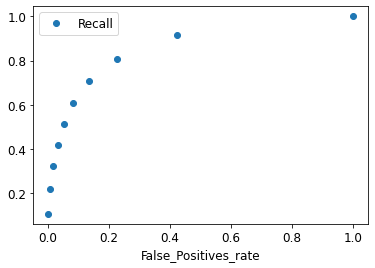

In [70]:
df_threshold = pd.DataFrame({"Recall":recall_list, "False_Positives_rate": fpr_list})
df_threshold.plot(x='False_Positives_rate', y='Recall', style='o')

#### Another dilemma arises. High recall at all costs?

we are not in an application where a false negative indicates the death of someone but we are simply predicting whether it is going to rain or not. In our example we prefer a high recall, but not at any price, we will have to find a balance. An application that never delivers a FN but never gets its right could cause user fatigue.

With this in mind, we prefer to stick with thrshold 0.2 which result on a  **Recall = 0.8** and a  **Precision = 0.5**

### ML - 5<a class="anchor" id="13"></a>
#### ROC-AUC
#### ROC
Another tool to measure the classification model performance visually is **ROC Curve**. ROC Curve stands for **Receiver Operating Characteristic Curve**. An **ROC Curve** is a plot which shows the performance of a classification model at various classification threshold levels. 


The **ROC Curve** plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold levels.



**True Positive Rate (TPR)** is also called **Recall**. It is defined as the ratio of `TP / (TP + FN).`



**False Positive Rate (FPR)** is defined as the ratio of `FP / (FP + TN).` = 1 - Specificity(precision)




In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).

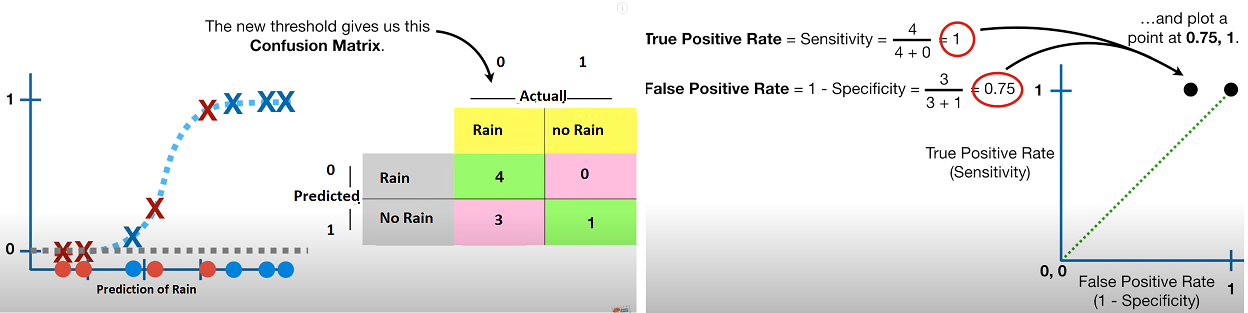

#### AUC


**AUC** stands for **Area Under Curve**. It is a technique to compare classifier performance. In this technique, we measure the `area under the curve (AUC)`. A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. 


So, **ROC AUC** is the percentage of the ROC plot that is underneath the curve.

In [71]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8729


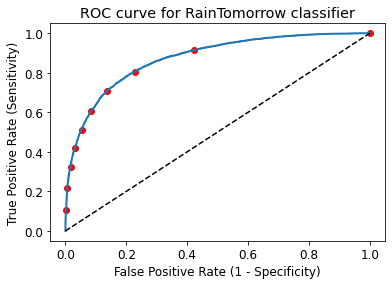

In [72]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

# I add the values calculate in the adjusting threshold and I plot them in red
ax = plt.subplot(1, 1, 1)
ax.scatter(fpr_list, recall_list,  c='red')
plt.show()

#### How to interpret ROC

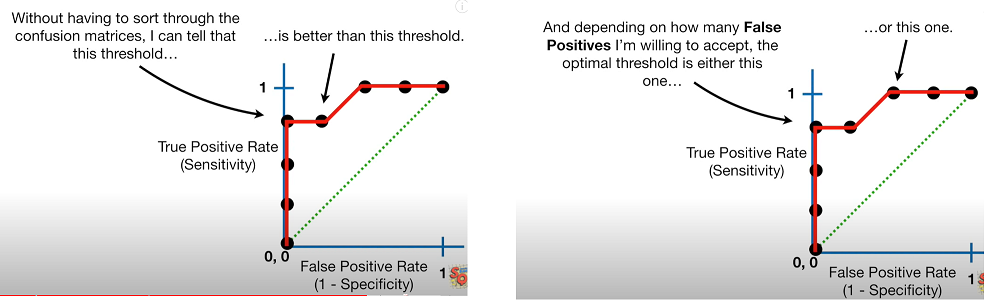

That mean for our case that we will take the 0.2 threshold as is have the most interesting results.

   - Accuracy score:  0.7801 
   - Recall(Sensitivity):  0.805 
   - Precision:  0.505
   - False Positive Rate 0.227 

#### Comments


- ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

- ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.

**But** that is a meassure to compare our model with other one. If Logistic regresion have a AUC of 0.9 and Random forest 0.7 we can conclude that Logistic regression is better than Random Forest.

###  ML - 6<a class="anchor" id="14"></a>
#### k-Fold Cross Validation

When we split our dataset into test and training, a common practice its 75% of our data to training and 25% for test. But how can we be sure that this is a good idea. Or that we are taking the correct percentage of data. This is where Cross Validation comes into play.
75% data training 25% for testiting its a 4-Fold because we split our data in 4 blocks. 

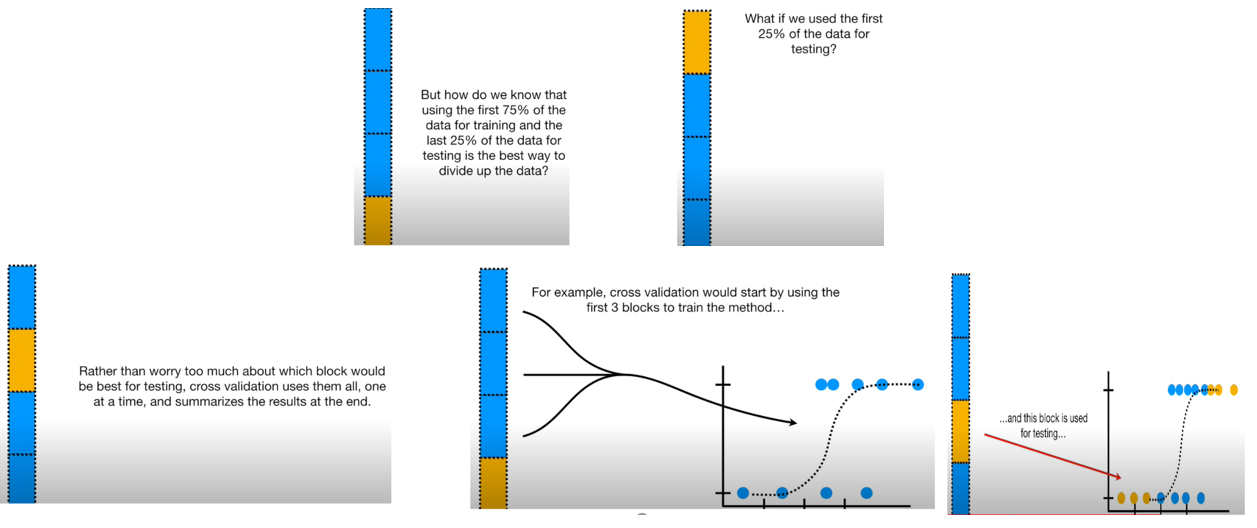

In [73]:
from sklearn.model_selection import cross_val_score

scores_5 = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores_5))

Cross-validation scores:[0.84743528 0.84576502 0.8460727  0.84844622 0.84747253]


In [74]:
scores_10 = cross_val_score(logreg, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores_10))

Cross-validation scores:[0.8487166  0.84511252 0.84546414 0.8466948  0.84518681 0.84720879
 0.84712088 0.85002198 0.85098901 0.84421978]


In [75]:
# compute Average cross-validation score

print('Average cross-validation 5-Fold score: {:.4f}'.format(scores_5.mean()))

print('Average cross-validation 10-Fold score: {:.4f}'.format(scores_10.mean()))

Average cross-validation 5-Fold score: 0.8470
Average cross-validation 10-Fold score: 0.8471


There is not improvement between 5 -10 fold. Our, original model score is found to be 0.8476. The average cross-validation score is 0.8474. So, we can conclude that cross-validation does not result in performance improvement.

### ML - 7<a class="anchor" id="15"></a>
#### Hyperparameter Optimization using GridSearch CV

Hyperparameters are the prameters that are added to the ML algorithm manually to try impove the desired performance. In the past we have adjusted hyperparameters as the value of C in a manual way.
**GridSearch CV** allows us to do it manually

The hyperparameter taht we are going to modify are:

    - 'solver': [‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]
    - 'penalty':[‘none’, ‘l1’, ‘l2’, ‘elasticnet’]
    -  'C':[0.01, 0.1, 1, 10, 100]

In [ ]:

# it take a lot ot time. 


start = time.time()


parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

end = time.time()
print("The Grid search taked {:.2f} seconds".format(end - start))

In [ ]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n', (grid_search.best_estimator_))

### -- End -- 

### Discussion<a class="anchor" id="16"></a>

#### outliers
When to assume that they are du to an error in the data and when to assume that they really represent a one-off event to learn from ?
- For example, once a x-months the traffic on our website is multiplied by 10 compared to a normal day, does this represent an "outliers" or its a punctual fact to learn from ? We could cross-reference the data and see if that traffic spike had to do with a special offer(for example)

#### cardinality

getting dummis, when to discard a column that has a very high cardinality ? it  could be that a column with a high cardinaliy could case us to fall into a "curse of dimensionality" problem.

#### Feature Scaling
We should map all the feature variables onto the same scale. It is called `feature scaling`. I will do it as follows.(not all the the Ml algoriths use the Feature Scaling )

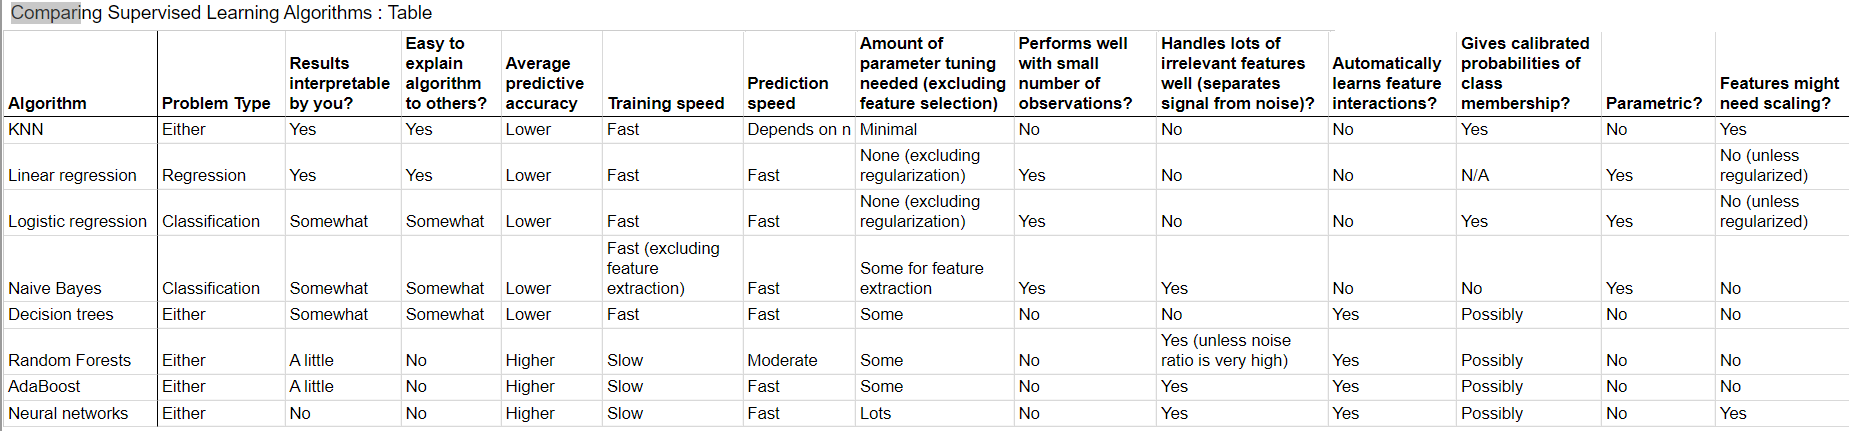

#### Underfitting vs Overfitting
Similar results in Test and Training are signal of underfitting  
Big differences between Test and Traing are signal of overfitting


Sweet spot is the solution


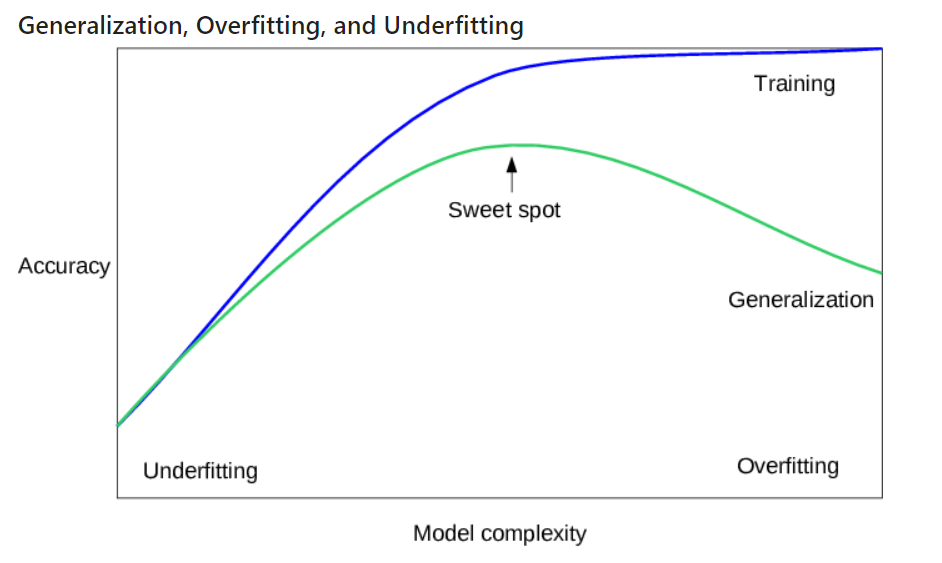

#### Credits


This notebook take some ideas from.

https://www.kaggle.com/code/prashant111/logistic-regression-classifier-tutorial/notebook


Some drawings used for the theory come from StatQuest with Josh Starmer.
https://www.youtube.com/c/joshstarmer


#### What have I improved compared to the one that is inspired ?

- Avoid print out information tha does not provide any value.
- Faturing engineering after dividing the data into training and test I consider it a mistake since it is double work.
- Hard-coding instead of making functions that work in a dynamic way.
- Understand the problem, wich metric is what interests us. recall ? accuracy ? precision ?
- The original author  puts his focus on acuraccy as the main metric. Acuraccy for clasification problems is not a good metric as it may be more interesting to focus on FP, FN etc..
- I have added my personal notes in the ML field.
- There are some questions that I have asked myself that I still do not have an answer to, I have put them at the end.